# Data Analysis

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [48]:
df = pd.read_csv("../data/diabetes_data.csv")
df.head()

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,2021-01-01,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,2,2021-01-02,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,3,2021-01-03,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,4,2021-01-04,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,5,2021-01-05,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   int64  
 1   date                  1000 non-null   object 
 2   weight                1000 non-null   float64
 3   height                1000 non-null   float64
 4   blood_glucose         1000 non-null   float64
 5   physical_activity     1000 non-null   float64
 6   diet                  1000 non-null   int64  
 7   medication_adherence  1000 non-null   int64  
 8   stress_level          1000 non-null   int64  
 9   sleep_hours           1000 non-null   float64
 10  hydration_level       1000 non-null   int64  
 11  bmi                   1000 non-null   float64
 12  risk_score            1000 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 101.7+ KB


In [50]:
df.describe()

,user_id,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,70.361797,170.795375,140.818899,30.294497,0.604000,0.69300,0.950000,7.076312,0.710000,24.385500,36.422120
std,288.819436,14.467165,9.742934,38.064177,19.305165,0.489309,0.46148,0.833183,1.883829,0.453989,5.872022,14.898022
min,1.000000,40.000000,150.000000,70.000000,0.000000,0.000000,0.00000,0.000000,4.000000,0.000000,10.900000,0.000000
25%,250.750000,60.286145,163.937583,114.080015,15.251591,0.000000,0.00000,0.000000,5.688762,0.000000,20.100000,25.746352
50%,500.500000,70.379509,170.630771,139.989969,30.003691,1.000000,1.00000,1.000000,6.998834,1.000000,24.100000,36.086756
75%,750.250000,79.719158,177.288822,166.436613,43.338908,1.000000,1.00000,2.000000,8.391989,1.000000,28.225000,46.402982
max,1000.000000,120.000000,200.000000,297.049508,94.861859,1.000000,1.00000,2.000000,12.000000,1.000000,45.200000,78.745396


In [51]:
df.isnull().sum()

user_id                 0
date                    0
weight                  0
height                  0
blood_glucose           0
physical_activity       0
diet                    0
medication_adherence    0
stress_level            0
sleep_hours             0
hydration_level         0
bmi                     0
risk_score              0
dtype: int64

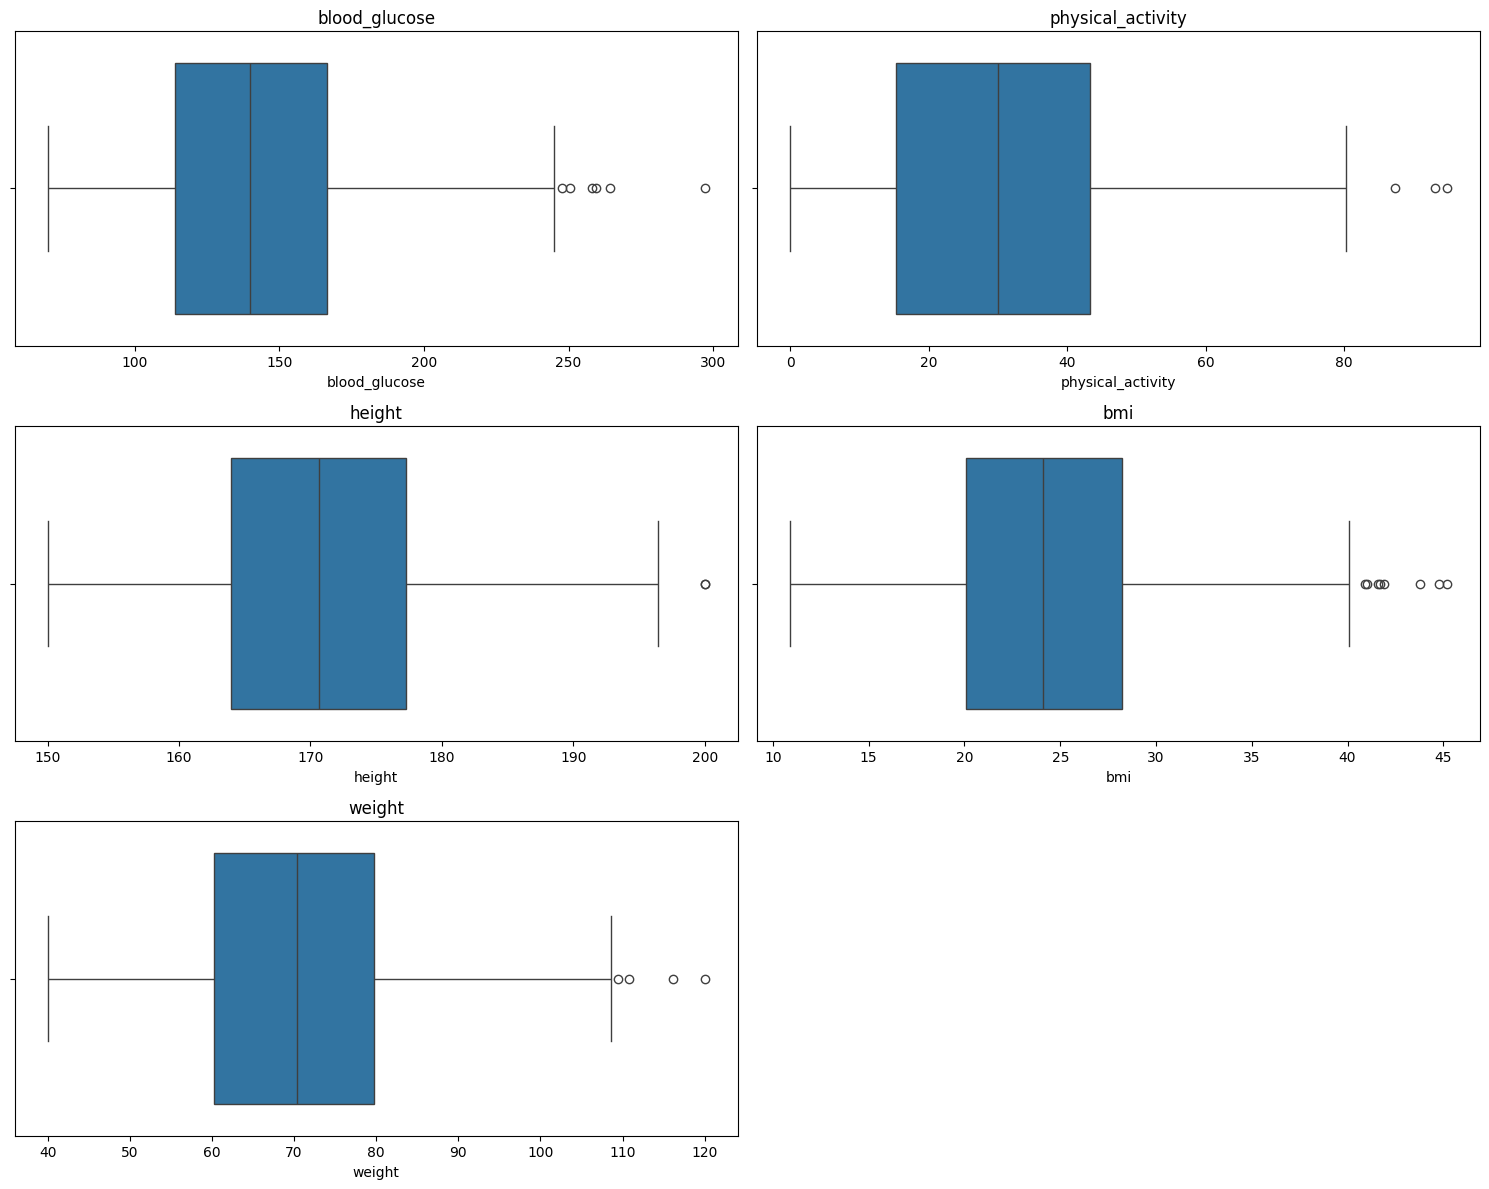

In [52]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

sns.boxplot(x=df['blood_glucose'], ax=axes[0, 0])
axes[0, 0].set_title('blood_glucose')

sns.boxplot(x=df['physical_activity'], ax=axes[0, 1])
axes[0, 1].set_title('physical_activity')

sns.boxplot(x=df['height'], ax=axes[1, 0])
axes[1, 0].set_title('height')

sns.boxplot(x=df['bmi'], ax=axes[1, 1])
axes[1, 1].set_title('bmi')

sns.boxplot(x=df['weight'], ax=axes[2, 0])
axes[2, 0].set_title('weight')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

In [53]:
num_duplicates = df.duplicated().sum()
print(f"Count of duplicates: {num_duplicates}")

Count of duplicates: 0


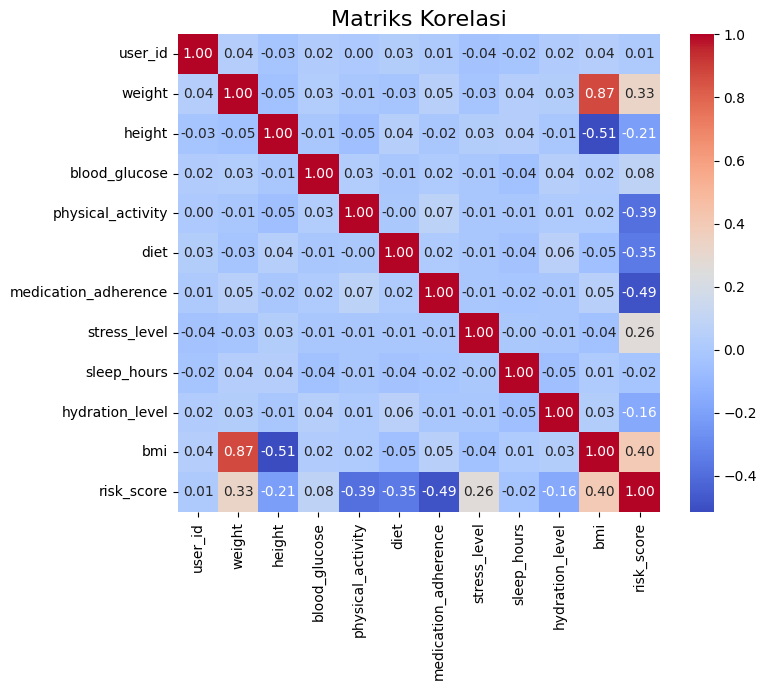

In [54]:
numerical_columns = df.drop(columns=['date']).select_dtypes(include=['number'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriks Korelasi", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Machine Learning

In [55]:
# Membagi data menjadi fitur X dan target y
X = df.drop(['user_id', 'date', 'risk_score'], axis = 1)
y = df['risk_score']

In [56]:
feature_names = X.columns

In [57]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [58]:
# Membagi data menjadi fitur (X) dan target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=100) 

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 10)
(300, 10)
(700,)
(300,)


## XGBoost

In [60]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')

# Menyusun parameter yang diperlukan untuk pencarian grid.
param_xgb = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'learning_rate': [0.1, 0.2],  # Kecepatan pembelajaran
    'max_depth': [3, 5, 10],  # Kedalaman maksimum pohon
    'subsample': [0.8, 1.0],  # Proporsi data yang digunakan untuk setiap pohon
    'min_child_weight': [1, 3, 5]  # Bobot minimum untuk node daun
}

# Melakukan pencarian grid dengan membagi dataset menjadi 5 bagian (5-fold cross-validation).
grid_search__xgb = GridSearchCV(xgb_regressor, param_xgb, cv=5)

# Melatih model menggunakan data pelatihan
grid_search__xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric='mae',
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]})

In [61]:
# Melihat parameter terbaik yang memberikan peningkatan maksimal pada Information Gain
grid_search__xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 200,
 'subsample': 1.0}

In [62]:
# Simpan parameter terbaik ke dalam variabel baru untuk digunakan lebih lanjut
best_gs_xgb = grid_search__xgb.best_estimator_


In [63]:
print('Score pada data pelatihan = ', round(best_gs_xgb.score(X_train, y_train), 4))
print('Score pada data pengujian = ', round(best_gs_xgb.score(X_test, y_test), 4))


Score pada data pelatihan =  0.9977
Score pada data pengujian =  0.9888


In [64]:
# Gunakan feature_importances_ untuk mendapatkan array yang menunjukkan tingkat kepentingan setiap fitur dalam data
# Array ini kurang informatif dalam bentuk mentah, sehingga perlu diubah menjadi format yang lebih mudah dibaca.
best_gs_xgb.feature_importances_


array([0.00194476, 0.00051056, 0.02093692, 0.0853847 , 0.15778904,
       0.40861642, 0.097426  , 0.01586882, 0.05012501, 0.16139786],
      dtype=float32)

In [65]:
# Simpan dalam variabel terpisah untuk membuat DataFrame (agar lebih mudah dibaca)
feature_importances = best_gs_xgb.feature_importances_


In [66]:
feature_importances_df = pd.DataFrame({'features': feature_names,
                                       'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=0)

,features,feature_importances
5,medication_adherence,0.408616
9,bmi,0.161398
4,diet,0.157789
6,stress_level,0.097426
3,physical_activity,0.085385
8,hydration_level,0.050125
2,blood_glucose,0.020937
7,sleep_hours,0.015869
0,weight,0.001945
1,height,0.000511


## Random Forest

In [67]:
reg_forest = RandomForestRegressor()

# Tentukan parameter untuk pengujian menggunakan GridSearchCV.
parametrs_fr = {'max_depth':[3, 5, 10],
              'n_estimators':[10, 100, 200],
              'max_features':[1, 3, 5, 7]}

# Jalankan model Random Forest, menguji parameter-parameter di atas, dengan pembagian data menjadi 5 bagian (cross-validation).
grid_search_reg_forest3 = GridSearchCV(reg_forest, parametrs_fr, cv=5)

# Latih model pada data pelatihan.
grid_search_reg_forest3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10], 'max_features': [1, 3, 5, 7],
                         'n_estimators': [10, 100, 200]})

In [68]:
# Lihat parameter terbaik yang ditemukan
grid_search_reg_forest3.best_params_

{'max_depth': 10, 'max_features': 7, 'n_estimators': 200}

In [69]:
# Evaluasi  koefisien determinasi - akurasi dari nilai yang di prediksi.
best_rf_reg3 = grid_search_reg_forest3.best_estimator_

In [70]:
print('Score pada data pelatihan = ', round(best_rf_reg3.score(X_train, y_train), 4))
print('Score pada data pengujian = ', round(best_rf_reg3.score(X_test, y_test), 4))

Score pada data pelatihan =  0.9822
Score pada data pengujian =  0.9133


In [71]:
# Gunakan feature_importances- untuk mengidentifikasi fitur-fitur yang paling signifikan untuk metode RF
best_rf_reg3.feature_importances_

array([0.04804431, 0.02027227, 0.02881359, 0.16777408, 0.09189927,
       0.23468497, 0.05485436, 0.02493772, 0.01269533, 0.31602411])

In [72]:
feature_importances2 = best_rf_reg3.feature_importances_

In [73]:
# Simpan untuk visualisasi dalam DataFrame
feature_importances_df2 = pd.DataFrame({'features': feature_names,
                                       'feature_importances': feature_importances2})
feature_importances_df2.sort_values('feature_importances', ascending=0)

,features,feature_importances
9,bmi,0.316024
5,medication_adherence,0.234685
3,physical_activity,0.167774
4,diet,0.091899
6,stress_level,0.054854
0,weight,0.048044
2,blood_glucose,0.028814
7,sleep_hours,0.024938
1,height,0.020272
8,hydration_level,0.012695


### Update X 

In [74]:
X = df.drop(['user_id', 'date', 'risk_score', 'weight'], axis = 1)
y = df['risk_score']

In [75]:
feature_names = X.columns

In [76]:
# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=100) 

## XGBoost

In [77]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')

# Tentukan parameter yang diperlukan untuk pencarian grid.
param_xgb = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.1, 0.2],  
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]    
}

# Lakukan pencarian grid dengan parameter yang ditntukan di atas, membagi data menjadi 5 bagian (cross-validation)
grid_search__xgb = GridSearchCV(xgb_regressor, param_xgb, cv=5)

# Latihan model pada data pelatihan.
grid_search__xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric='mae',
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]})

In [78]:
# Lihat parameter terbaik yang memberikan peningkatan maksimal pada information Gain 
grid_search__xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 200,
 'subsample': 0.8}

In [99]:
# simpan parameter terbaik dalam vaiabel baru agar bisa digunakan lebih lanjut.
best_gs_xgb = grid_search__xgb.best_estimator_
model_path = "../models/best_xgb_model.pkl"
with open(model_path, "wb") as file:
    pickle.dump(best_gs_xgb, file)
print(f"Model terbaik berhasil disimpan di {model_path}")

Model terbaik berhasil disimpan di ../models/best_xgb_model.pkl


In [80]:
y_pred = best_gs_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print('Score pada data pelatihan = ', round(best_gs_xgb.score(X_train, y_train), 4))
print('Score  pada data pengujian = ', round(best_gs_xgb.score(X_test, y_test), 4))
print(f"MAE: {mae:.4f}")

Score pada data pelatihan =  0.9979
Score  pada data pengujian =  0.9891
MAE: 1.2052


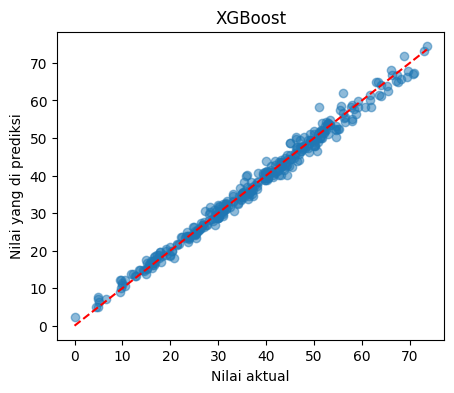

In [81]:
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('Nilai aktual')
plt.ylabel('Nilai yang di prediksi')
plt.title('XGBoost')
plt.show()

## Random Forest

In [82]:
reg_forest = RandomForestRegressor()

# Tentukan parameter untuk pengujian menggunakan GridSearchCV.
parametrs_fr = {'max_depth':[3, 5, 10],
              'n_estimators':[10, 100, 200],
              'max_features':[1, 3, 5, 7]}

# Lakukan pencarian grid dengan model RandomForestRegressor, menguji parameter yang disebutkan diatas,
# dan membagi data menjadi 5 bagian (cross-validation)
grid_search_reg_forest3 = GridSearchCV(reg_forest, parametrs_fr, cv = 5)

# Latih model menggunakan data pelatihan.
grid_search_reg_forest3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10], 'max_features': [1, 3, 5, 7],
                         'n_estimators': [10, 100, 200]})

In [83]:
# Lihat parameter terbaik yang ditemukan.
grid_search_reg_forest3.best_params_

{'max_depth': 10, 'max_features': 5, 'n_estimators': 200}

In [84]:
# Evaluasi koefisien determinasi - akurasi dari nilai yang diprediksi.
best_rf_reg3 = grid_search_reg_forest3.best_estimator_

In [85]:
y_pred2 = best_rf_reg3.predict(X_test)

mae = mean_absolute_error(y_test, y_pred2)

print('Score pada data pelatihan = ', round(best_rf_reg3.score(X_train, y_train), 4))
print('Score pada data pengujian = ', round(best_rf_reg3.score(X_test, y_test), 4))
print(f"MAE: {mae:.4f}")

Score pada data pelatihan =  0.9821
Score pada data pengujian =  0.9136
MAE: 3.5569


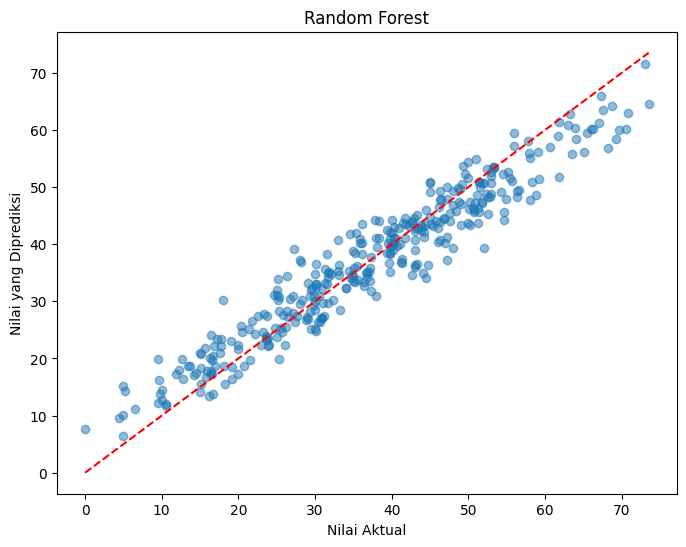

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred2, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai yang Diprediksi')
plt.title('Random Forest')
plt.show()

## KNeighbors

In [87]:
knn = KNeighborsRegressor()

param_knn = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': range(10, 50, 5)}

grid_search_knn2 = GridSearchCV(knn, param_knn, cv=5)
grid_search_knn2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': range(10, 50, 5),
                         'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']})

In [88]:
grid_search_knn2.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 19,
 'weights': 'distance'}

In [89]:
# Simpan parameter terbaik ke dalam variabel baru untuk digunakan lebih lanjut
best_gs_knn2 = grid_search_knn2.best_estimator_

In [90]:
y_pred3 = best_gs_knn2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred3)

print('Score pada data pelatihan = ', round(best_gs_knn2.score(X_train, y_train), 4))
print('Score pada data pengujian = ', round(best_gs_knn2.score(X_test, y_test), 4))
print(f"MAE: {mae:.4f}")

Score pada data pelatihan =  1.0
Score pada data pengujian =  0.2674
MAE: 10.5898


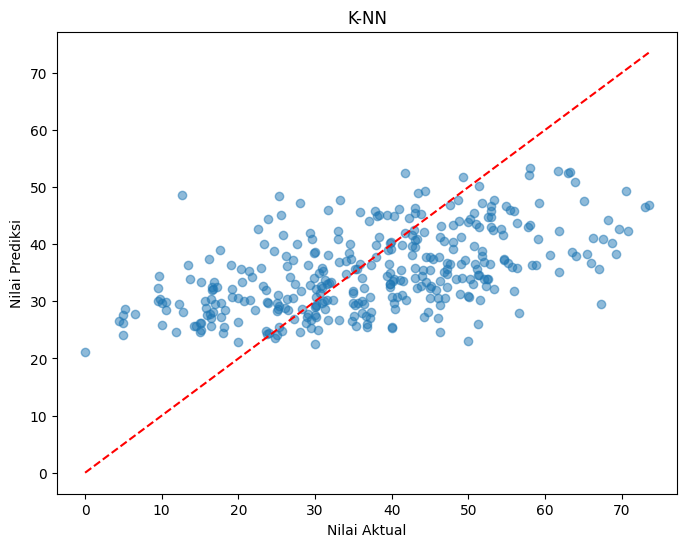

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred3, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('K-NN')
plt.show()

## Best Model

- Setelah semua uji coba, model terbaik adalah: **XGBoost** 

Model ini menunjukkan performa yang sangat baik dengan hasil sebagai berikut:

```
Score pada data pelatihan =  0.9979
Score pada data pengujian =  0.9891
MAE: 1.2052
```

In [ ]:
# import pickle
# import os

# # Simpan model terbaik
# best_gs_xgb = grid_search__xgb.best_estimator_  # Model terbaik yang sudah dilatih
# os.makedirs("../models", exist_ok=True)  # Buat direktori 'models' jika belum ada

# model_path = "../models/best_xgb_model.pkl"
# with open(model_path, "wb") as file:
#     pickle.dump(best_gs_xgb, file)

# print(f"Model terbaik berhasil disimpan di {model_path}")


Model terbaik berhasil disimpan di ../models/best_xgb_model.pkl
